<a href="https://colab.research.google.com/github/siddhant0704/Cancer_cell/blob/master/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification on Masked Dataset**



# **Importing Libraries**

In [11]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
sns.set()




# **Loading Dataset**


In [12]:
train = pd.read_csv('/content/Data Science HW design model.csv')
val = pd.read_csv('/content/Data Science HW design val.csv')

# **Exploratory Data Analysis**

Data information of the Training Dataset

In [13]:
# Summary of the training dataframe.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94000 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       94000 non-null  float64
 1   A2       94000 non-null  float64
 2   A3       94000 non-null  float64
 3   A4       94000 non-null  float64
 4   A5       94000 non-null  float64
 5   A6       94000 non-null  float64
 6   A7       94000 non-null  float64
 7   A8       94000 non-null  float64
 8   A9       94000 non-null  float64
 9   A10      94000 non-null  float64
 10  A11      94000 non-null  float64
 11  A12      94000 non-null  float64
 12  A13      94000 non-null  float64
 13  A14      94000 non-null  float64
 14  A15      94000 non-null  float64
 15  A16      94000 non-null  float64
 16  A17      94000 non-null  float64
 17  A18      94000 non-null  float64
 18  A19      94000 non-null  float64
 19  A20      94000 non-null  float64
 20  A21      94000 non-null  int64  
 21  A22      940

Data Information of validation Dataset

In [14]:
# Summary of the validation dataframe.
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       11500 non-null  float64
 1   A2       11500 non-null  float64
 2   A3       11500 non-null  float64
 3   A4       11500 non-null  float64
 4   A5       11500 non-null  float64
 5   A6       11500 non-null  float64
 6   A7       11500 non-null  float64
 7   A8       11500 non-null  float64
 8   A9       11500 non-null  float64
 9   A10      11500 non-null  float64
 10  A11      11500 non-null  float64
 11  A12      11500 non-null  float64
 12  A13      11500 non-null  float64
 13  A14      11500 non-null  float64
 14  A15      11500 non-null  float64
 15  A16      11500 non-null  float64
 16  A17      11500 non-null  float64
 17  A18      11500 non-null  float64
 18  A19      11500 non-null  float64
 19  A20      11500 non-null  float64
 20  A21      11500 non-null  int64  
 21  A22      115

In [15]:
# Statistic summary for the training dataframe
train.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,9.400000e+04,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.134211,83.838361,7319.620881,13449.501569,33.507640,36.983300,1.518232,124.108845,1.697824,1.407075,82.561804,11.364377,20.453328,55.172549,1.036205e+05,0.282347,4113.993992,0.190747,0.112162,1.545606,53.707096,0.074435,0.008550,0.013537,0.133531,290.756534,357.976444,103.482568,28.847016,38.509910,0.042553
std,6.587858,8.672843,2652.539364,8197.452662,11.906865,14.209314,1.007398,33.130292,0.776810,0.652138,10.740732,2.767727,11.671429,12.015331,5.954836e+04,0.252047,1300.549863,0.181137,0.142458,0.627285,56.617973,0.138356,0.020052,0.029078,0.156658,471.958770,597.594147,136.248095,62.759062,90.882963,0.201849
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.460000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.010000,-0.020000,-0.020000,0.000000,-751.260000,-405.370000,-616.230000,-490.160000,-719.720000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,77.270000,9.640000,13.600000,49.070000,6.562992e+04,0.130000,3422.220000,0.080000,0.000000,1.140000,19.000000,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,83.340000,11.330000,19.110000,55.190000,9.074253e+04,0.250000,4050.000000,0.170000,0.090000,1.450000,39.000000,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,89.010000,12.790000,25.170000,61.810000,1.282739e+05,0.360000,4668.192500,0.250000,0.140000,1.860000,69.000000,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,62.710000,100.000000,26333.500000,170300.000000,146.000000,146.000000,18.670000,524.000000,44.000000,44.000000,100.000000,35.430000,237.000000,146.000000,1.079286e+06,7.000000,20000.000000,3.250000,5.000000,8.100000,1902.000000,5.300000,0.700000,1.690000,4.080000,15288.660000,19503.760000,3265.980000,6561.930000,13487.000000,1.000000



 To check the variation in the Training data i.e checking the number of distinct elements in the training set.


In [16]:
# Checking the number of unique elements in each column of the dataframe
train.nunique(axis=0)

A1          3381
A2          4541
A3         73162
A4         59682
A5          6144
A6          6777
A7           755
A8         14728
A9          2647
A10         2124
A11         4955
A12         2035
A13         4946
A14         6608
A15        79651
A16          242
A17        46499
A18          172
A19          165
A20          504
A21          587
A22          213
A23           48
A24           66
A25          180
A26        45351
A27        45396
A28        29538
A29        14293
A30        18430
default        2
dtype: int64

Finding discrete features in the dataset


In [17]:
dataset = train.copy()
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O'] # Checking no mixed values exists in the column
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<50 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [18]:
print('The discrete features presennt in the dataset is:', discrete_feature)

The discrete features presennt in the dataset is: ['A23', 'default']



Finding continous features in the dataset


In [19]:
#Find continous features
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 29


Plotting features as histograms to check for distributions

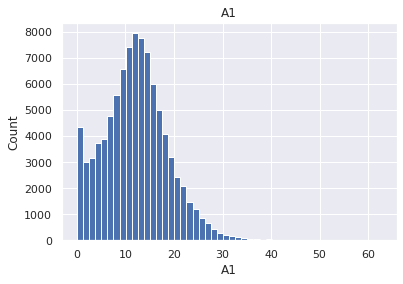

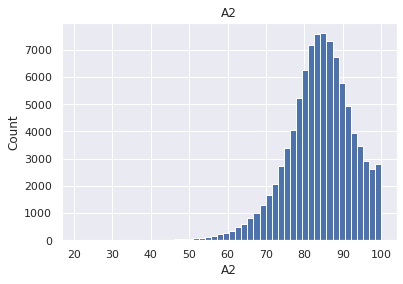

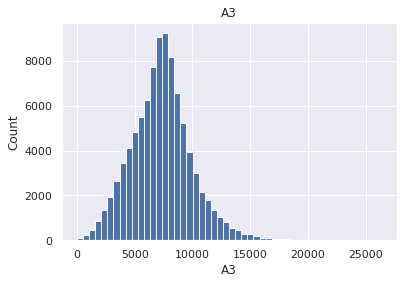

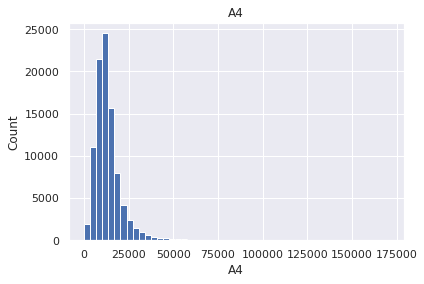

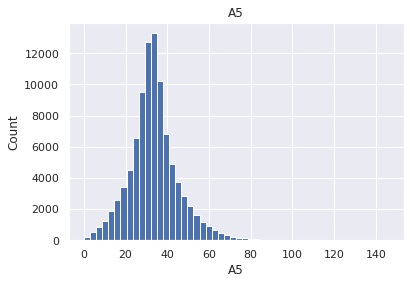

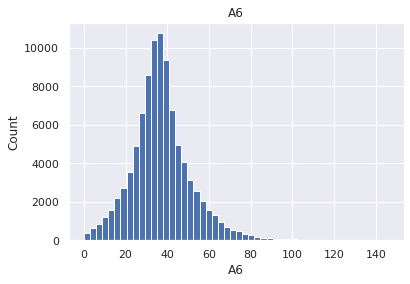

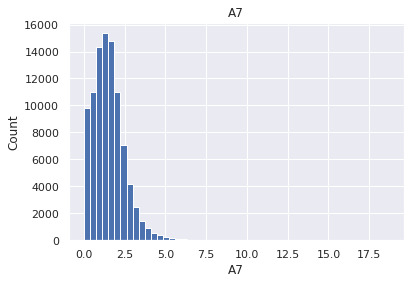

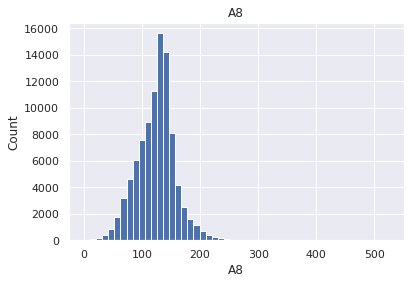

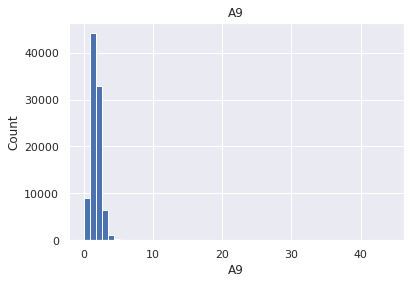

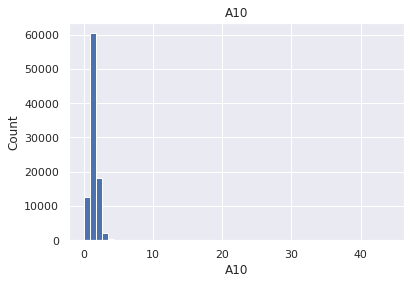

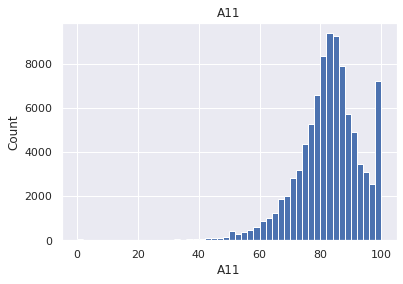

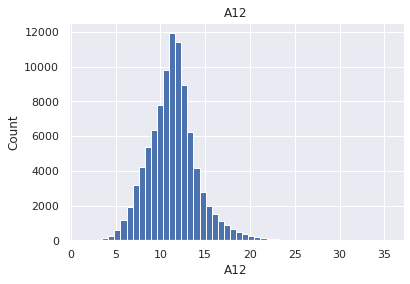

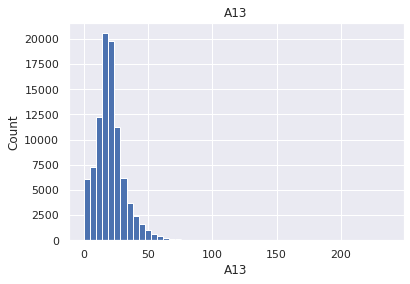

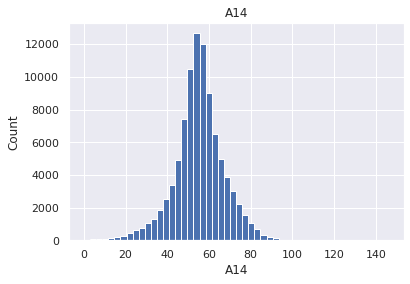

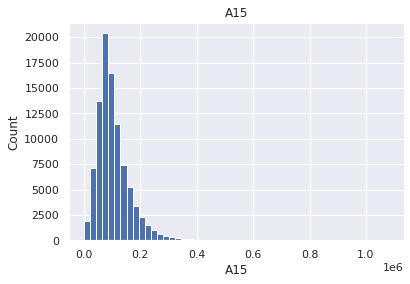

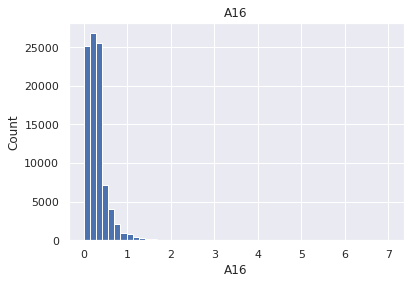

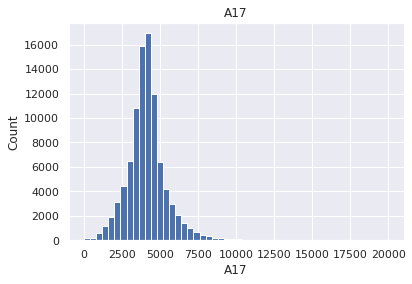

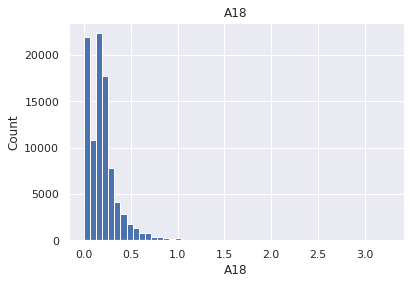

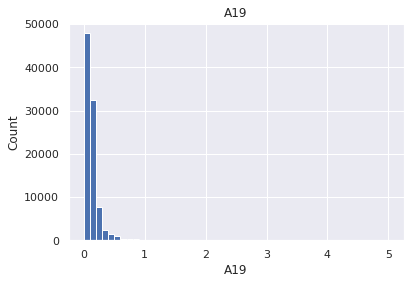

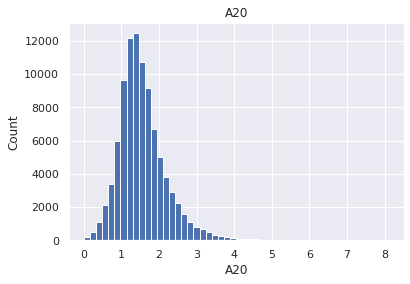

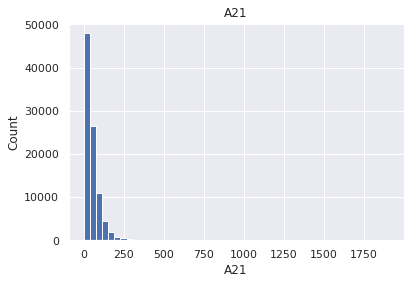

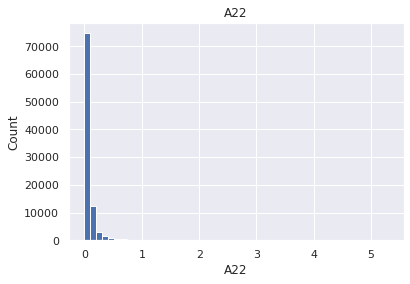

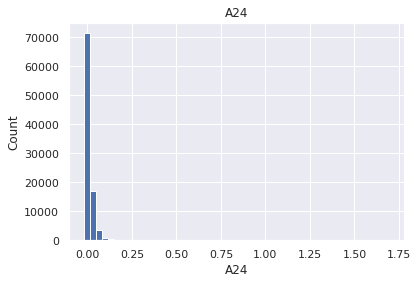

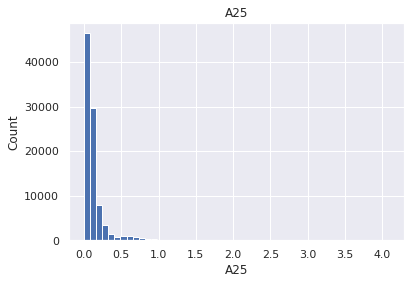

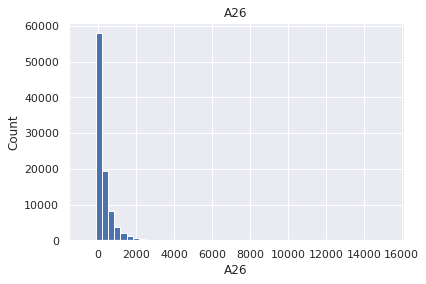

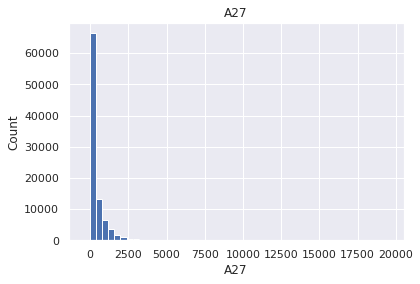

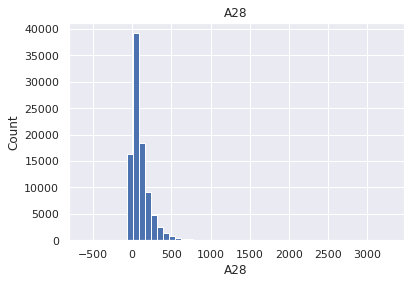

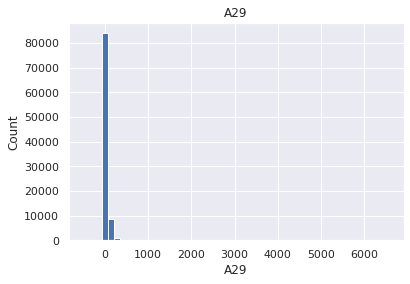

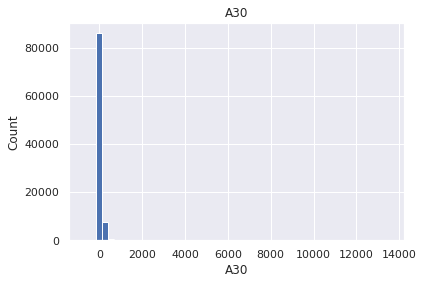

In [20]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=50) # Number of bars in histogram 
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Box plots to visualise quartiles and find outliers


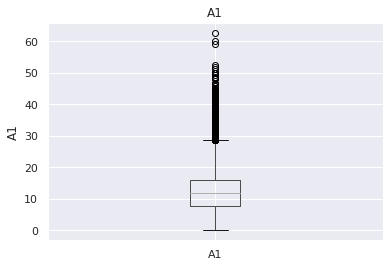

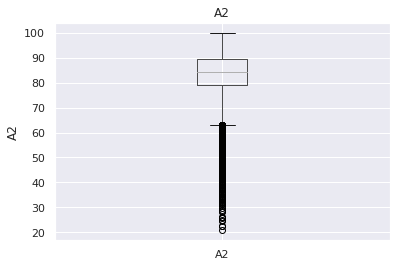

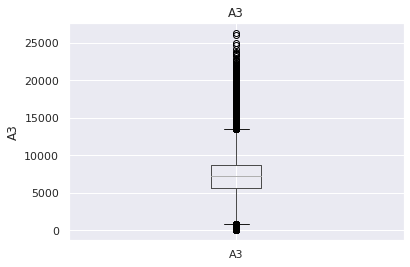

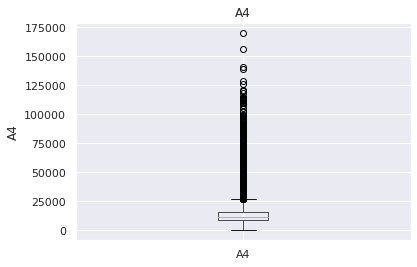

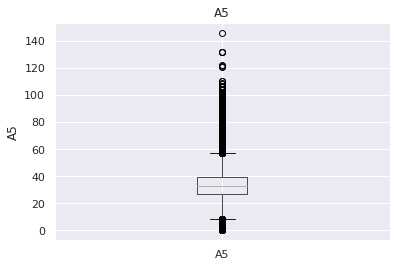

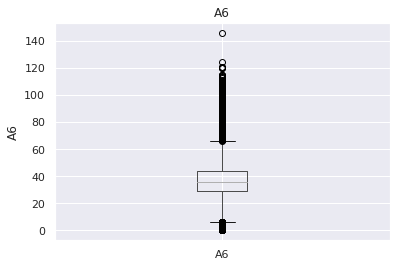

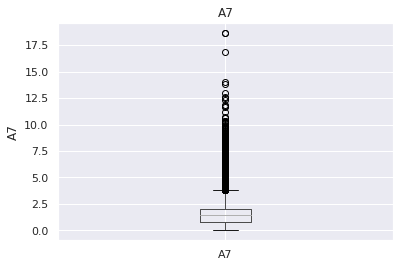

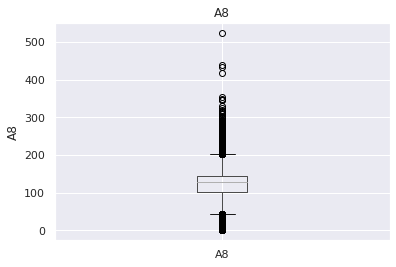

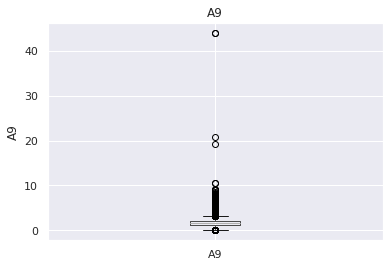

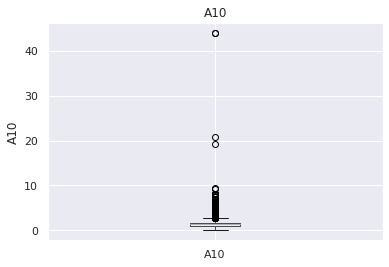

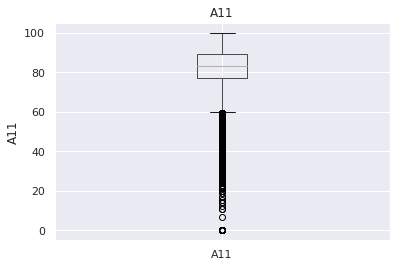

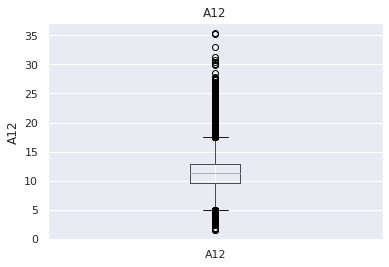

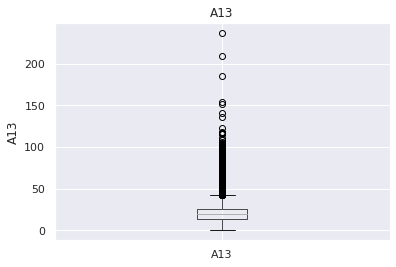

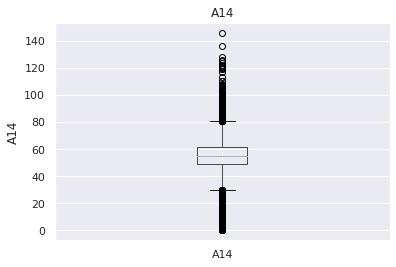

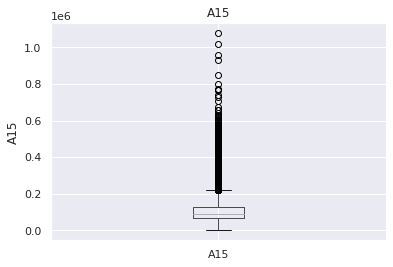

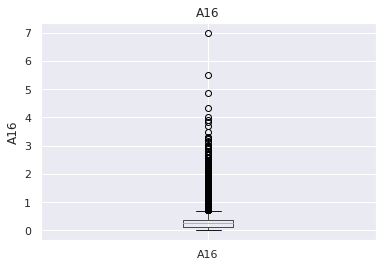

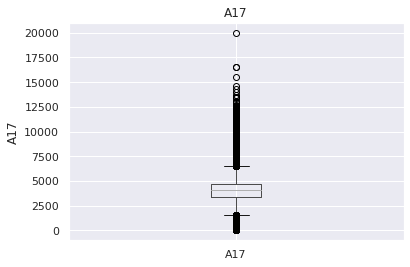

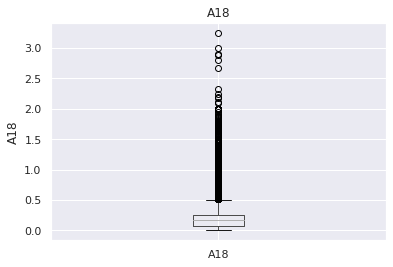

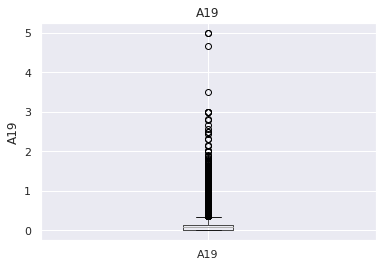

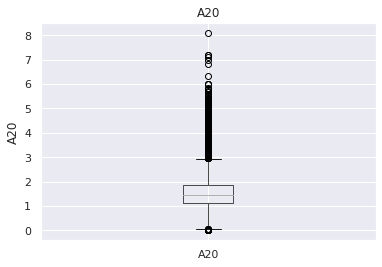

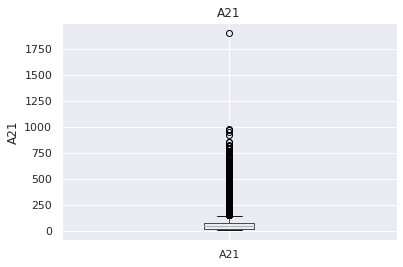

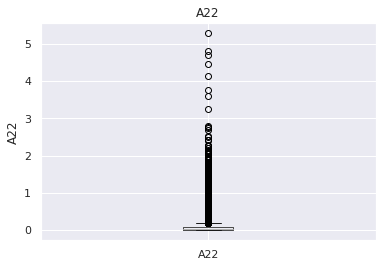

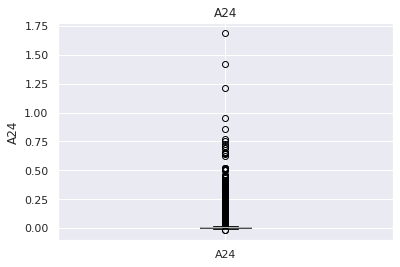

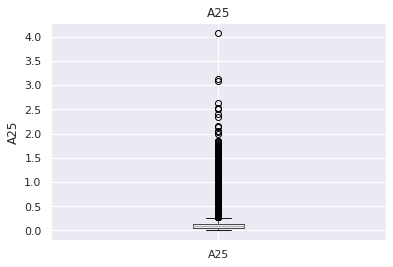

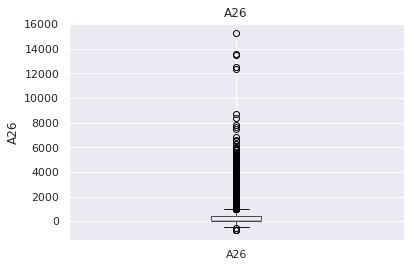

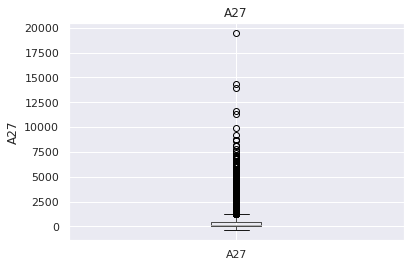

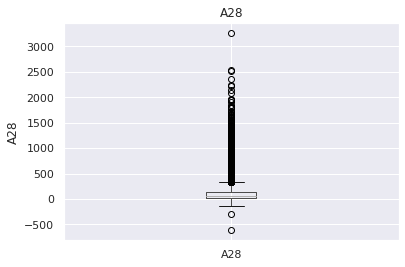

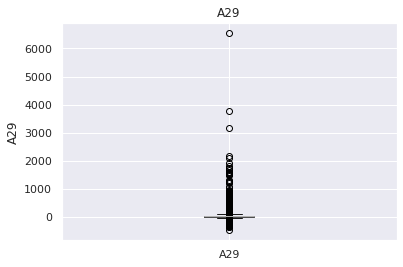

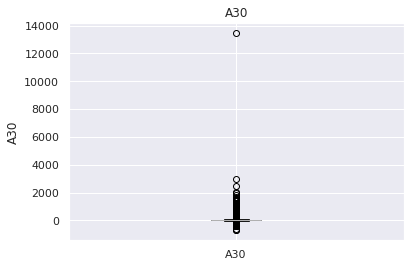

In [21]:
for feature in continuous_feature:
    data=dataset.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [22]:
df = train.copy()
df.drop(df.index[df['A1'] > 55], inplace=True) # Changes are updated without returning anything
df.drop(df.index[df['A5'] > 130], inplace=True)
df.drop(df.index[df['A6'] > 140], inplace=True)
df.drop(df.index[df['A7'] > 17.5], inplace=True)
df.drop(df.index[df['A8'] > 500], inplace=True)
df.drop(df.index[df['A9'] > 40], inplace=True)
df.drop(df.index[df['A10'] > 40], inplace=True)
df.drop(df.index[df['A13'] > 200], inplace=True)
df.drop(df.index[df['A17'] > 20000], inplace=True)
df.drop(df.index[df['A21'] > 1750], inplace=True)
df.drop(df.index[df['A26'] > 14000], inplace=True)
df.drop(df.index[df['A27'] > 17500], inplace=True)
df.drop(df.index[df['A28'] > 3000], inplace=True)
df.drop(df.index[df['A29'] > 6000], inplace=True)
df.drop(df.index[df['A30'] > 12000], inplace=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93982 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       93982 non-null  float64
 1   A2       93982 non-null  float64
 2   A3       93982 non-null  float64
 3   A4       93982 non-null  float64
 4   A5       93982 non-null  float64
 5   A6       93982 non-null  float64
 6   A7       93982 non-null  float64
 7   A8       93982 non-null  float64
 8   A9       93982 non-null  float64
 9   A10      93982 non-null  float64
 10  A11      93982 non-null  float64
 11  A12      93982 non-null  float64
 12  A13      93982 non-null  float64
 13  A14      93982 non-null  float64
 14  A15      93982 non-null  float64
 15  A16      93982 non-null  float64
 16  A17      93982 non-null  float64
 17  A18      93982 non-null  float64
 18  A19      93982 non-null  float64
 19  A20      93982 non-null  float64
 20  A21      93982 non-null  int64  
 21  A22      939

Describing the imbalance ratio

In [24]:
# Counting the number of unique values and divinding by total values
train['default'].value_counts()/train.shape[0]

0    0.957447
1    0.042553
Name: default, dtype: float64

# **Feature Engineering**

Checking the correlation of different features present


In [25]:
X = train.iloc[:,:]
corr_matrix = X.corr()
corr_matrix

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
A1,1.000000,-0.748951,-0.471054,-0.378873,0.492054,0.483082,0.526474,-0.373436,-0.331232,-0.295327,-0.484337,-0.372810,0.398576,0.397312,-0.303691,0.503393,-0.278716,0.456614,0.385320,0.286464,0.009520,0.041449,0.005592,0.042981,0.039630,-0.052968,0.036289,-0.007522,-0.018154,-0.034801,0.224554
A2,-0.748951,1.000000,0.517863,0.407799,-0.482518,-0.482486,-0.618724,0.375246,0.410535,0.380494,0.770950,0.381769,-0.395979,-0.394871,0.377217,-0.381696,0.292379,-0.350420,-0.298464,-0.229001,-0.003766,-0.060587,-0.019050,-0.064202,-0.038414,0.056671,-0.030326,0.016198,0.022400,0.034842,-0.214566
A3,-0.471054,0.517863,1.000000,0.665712,-0.515764,-0.568834,-0.445058,0.547352,0.526460,0.487397,0.419552,0.465938,-0.445843,-0.382244,0.541844,-0.280378,0.363778,-0.254478,-0.235661,-0.337238,-0.006657,-0.068615,-0.022535,-0.067817,-0.012097,0.079143,-0.032491,0.028643,0.029465,0.044163,-0.173111
A4,-0.378873,0.407799,0.665712,1.000000,-0.315091,-0.412735,-0.379968,0.369470,0.493178,0.390337,0.318121,0.338775,-0.343314,-0.269608,0.583112,-0.217860,0.337408,-0.199547,-0.185777,-0.207659,-0.042018,-0.085139,-0.039447,-0.078386,-0.024151,0.044232,-0.052939,-0.003614,0.013625,0.031632,-0.123059
A5,0.492054,-0.482518,-0.515764,-0.315091,1.000000,0.903871,0.391876,-0.434256,-0.294310,-0.285118,-0.372822,-0.396888,0.704559,0.681524,-0.185134,0.267639,-0.254142,0.234799,0.221141,0.364923,0.006974,0.029200,-0.009370,0.028006,0.020678,-0.060580,0.037347,-0.011727,-0.009589,-0.030253,0.180650
A6,0.483082,-0.482486,-0.568834,-0.412735,0.903871,1.000000,0.401520,-0.451374,-0.335913,-0.307062,-0.370367,-0.409220,0.599355,0.641190,-0.231465,0.273023,-0.261100,0.241083,0.223022,0.374750,0.010556,0.036536,-0.004372,0.034941,0.020218,-0.061436,0.041389,-0.010940,-0.008679,-0.031773,0.178333
A7,0.526474,-0.618724,-0.445058,-0.379968,0.391876,0.401520,1.000000,-0.298279,-0.344282,-0.308982,-0.481260,-0.302859,0.341161,0.332789,-0.363371,0.470803,-0.249220,0.422848,0.371383,0.250110,0.037808,0.076212,0.031466,0.073371,0.028496,-0.029096,0.048421,0.007466,-0.001576,-0.022805,0.166574
A8,-0.373436,0.375246,0.547352,0.369470,-0.434256,-0.451374,-0.298279,1.000000,0.287236,0.244410,0.301637,0.843509,-0.343502,-0.462648,0.115539,-0.199455,0.229474,-0.173153,-0.173277,-0.552098,0.004991,-0.001955,0.024085,-0.005212,-0.007704,0.070861,-0.009729,0.044007,0.037701,0.042242,-0.150192
A9,-0.331232,0.410535,0.526460,0.493178,-0.294310,-0.335913,-0.344282,0.287236,1.000000,0.911302,0.335947,0.227930,-0.297716,-0.112229,0.554400,-0.194024,0.299464,-0.179986,-0.162913,-0.134941,-0.008593,-0.072741,-0.039863,-0.070636,0.033181,0.047023,-0.013711,0.023007,0.029357,0.024106,-0.132580
A10,-0.295327,0.380494,0.487397,0.390337,-0.285118,-0.307062,-0.308982,0.244410,0.911302,1.000000,0.315684,0.185088,-0.270177,-0.071449,0.534133,-0.174595,0.273145,-0.162724,-0.146519,-0.097198,-0.000040,-0.067156,-0.039082,-0.066107,0.050839,0.043492,-0.005433,0.024532,0.026497,0.020610,-0.125432


Plotting heat-map for the correlation matrix


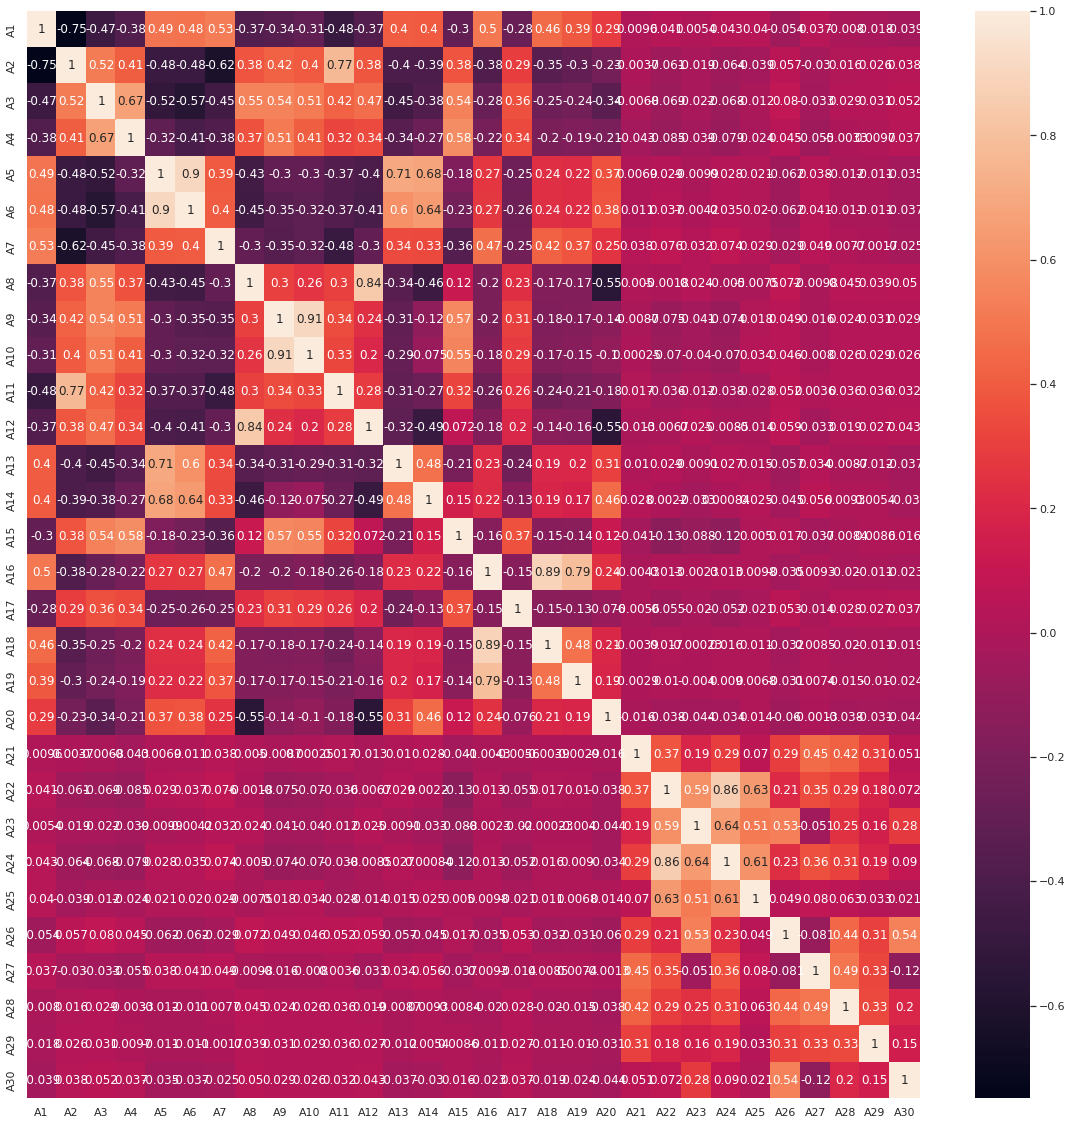

In [26]:
corr=X.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [27]:
# Find features with correlation greater than 0.9
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) # np.triu chooses the upper half of the matrix (k=1)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)] # np.ones returns a new array of a given size
print('Columns to be dropped:',to_drop)

Columns to be dropped: ['A6', 'A10']


Drop Features with correlation greater than 0.9


In [28]:
train = train.drop(['A6', 'A10'], axis=1)
val = val.drop(['A6', 'A10'], axis=1)

Choosing the features from the data that contributes most to the target variable.

In [29]:
from sklearn.feature_selection import SelectKBest

In [30]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
ordered_rank_features=SelectKBest(k=28)
ordered_feature=ordered_rank_features.fit(X,y)

In [31]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(train.columns)

In [32]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [33]:
features_rank.columns=['Features','Score']

In [34]:
# Ranked the features based on the scores
features_rank.nlargest(28,'Score')

,Features,Score
0,A1,4991.490853
1,A2,4536.403374
4,A5,3171.043651
2,A3,2903.908408
5,A7,2682.580609
8,A11,2451.700776
10,A13,2179.518384
6,A8,2169.313993
13,A16,1817.272934
7,A9,1681.805441


In [35]:
new_train = train.drop(['A24', 'A22', 'A26', 'A30', 'A28', 'A21', 'A29', 'A25', 'A23', 'A27'], axis=1)

In [36]:
new_train.head()

,A1,A2,A3,A4,A5,A7,A8,A9,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,default
0,10.69,86.10,8920.16,19912.85,30.42,1.18,145.41,2.236,84.29,13.46,16.01,52.18,123101.84,0.23,4305.85,0.15,0.09,1.09,0
1,28.50,65.19,6564.00,6716.67,32.50,2.74,91.11,1.000,59.80,8.18,29.33,63.55,34275.73,0.80,3616.67,0.78,0.14,1.67,0
2,24.87,73.79,4285.47,6463.75,40.50,2.84,93.90,2.400,77.17,10.25,39.92,61.95,84841.79,0.78,2301.54,0.62,0.15,2.80,0
3,13.64,85.82,6887.56,9244.44,49.56,0.36,171.45,1.875,95.88,15.38,49.80,67.22,145261.11,0.09,3419.60,0.09,0.00,1.00,0
4,4.50,95.92,8746.50,19987.50,32.75,0.92,153.25,2.000,94.55,11.87,17.43,50.70,120522.80,0.17,3828.57,0.08,0.00,2.69,0


In [37]:
new_val = val.drop(['A24', 'A22', 'A26', 'A30', 'A28', 'A21', 'A29', 'A25', 'A23', 'A27'], axis=1)

In [38]:
new_val.head()

,A1,A2,A3,A4,A5,A7,A8,A9,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,default
0,22.88,75.59,3367.08,6131.31,41.38,2.13,102.67,0.500,75.85,9.48,22.22,58.46,42131.54,0.65,4005.22,0.33,0.33,1.25,1
1,15.94,86.26,5595.00,10867.86,52.29,3.05,124.94,3.200,75.00,11.72,15.73,63.36,148530.21,0.33,2281.82,0.38,0.00,2.37,1
2,25.16,64.20,4758.44,7818.15,46.28,2.69,110.16,1.124,62.57,10.53,32.24,62.83,39652.58,0.55,3050.54,0.36,0.25,1.51,1
3,19.50,77.81,5762.27,6290.00,58.14,2.44,119.92,1.222,82.50,9.65,48.73,66.29,86341.79,0.50,4169.09,0.31,0.27,2.69,1
4,11.11,85.09,11400.50,20936.25,30.00,0.50,125.89,2.167,95.86,10.35,37.20,63.30,224497.30,0.00,8970.00,0.00,0.00,1.25,1


Advantages: 

1.   Reduces Overfitting: Less redundant data means less possibility of making decisions based on redundant data/noise.
2.   Improves Accuracy: Less misleading data means modeling accuracy improves.
3.   Reduces Training Time: Less data means that algorithms train faster.






# **Model Training**

In [39]:
X = new_train.iloc[:, :-1].values
y = new_train.iloc[:, -1].values
val_X = new_val.iloc[:, :-1].values
val_y = new_val.iloc[:, -1].values

In [40]:
X.shape

(94000, 18)

In [41]:
val_X.shape

(11500, 18)

Performing standardisation on numerical data columns before logistic regression


In [42]:
# To ensure each feature is given equal priority
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
val_X = sc.transform(val_X)

Implementing Logistic Regression with class weights


In [43]:
w = {0:1, 1:4.5}
# define model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=13, class_weight=w)
lr.fit(X,y)

LogisticRegression(class_weight={0: 1, 1: 4.5}, random_state=13)

Confusion matrix on Logistic Regression (with Class Weights)

In [44]:
# Giving better results since the output class was imbalanced
from sklearn.metrics import confusion_matrix, accuracy_score
lr_y_pred = lr.predict(val_X)
cm = confusion_matrix(val_y, lr_y_pred)
print(cm)
accuracy = accuracy_score(val_y, lr_y_pred)
print("Accuracy :", accuracy)
precision = precision_score(val_y, lr_y_pred, average='weighted')
print("Precision :", precision)
recall = recall_score(val_y, lr_y_pred)
print("Recall :", recall)
F1score = f1_score(val_y, lr_y_pred)
print("F1 score:", F1score)


[[9765  235]
 [1062  438]]
Accuracy : 0.8872173913043478
Precision : 0.8691604107718516
Recall : 0.292
F1 score: 0.40312931431201104


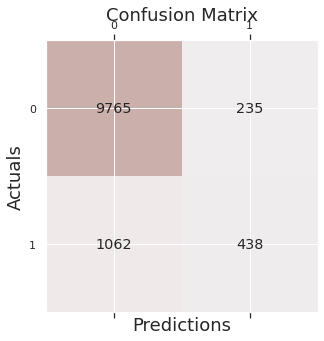

In [45]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Tuning the Logistic Regression Model with different parameters


In [46]:
from sklearn.model_selection import RandomizedSearchCV
w = [{0:1.0,1:4.7}, {0:1.0,1:4.6}, {0:1.0,1:4.4}, {0:1.0,1:4.3}, 
     {0:1.0,1:4.8}, {0:1.0,1:4.5},{0:1.0,1:4.2},{0:1.0,1:4}, 
     {0:1.0,1:3}, {0:10,1:2},{0:100,1:1} ]
params = {
    'class_weight': w,
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(0,1000,100)),
    'solver': ['liblinear','lbfgs','newton-cg'], # solver tries to find the parameter weights that minimize a cost function. 
    'C' : [1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100], # C is the regularization parameter (C = 1/λ)
    'verbose' : [0,1,2,3,4,5]
}
lr_search = RandomizedSearchCV(estimator = lr, 
                            param_distributions=params, 
                            cv=10,
                            random_state=13, 
                            n_jobs=-1)
lr_search.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

[LibLinear]

RandomizedSearchCV(cv=10,
                   estimator=LogisticRegression(class_weight={0: 1, 1: 4.5},
                                                random_state=13),
                   n_jobs=-1,
                   param_distributions={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                              0.1, 1, 10, 100],
                                        'class_weight': [{0: 1.0, 1: 4.7},
                                                         {0: 1.0, 1: 4.6},
                                                         {0: 1.0, 1: 4.4},
                                                         {0: 1.0, 1: 4.3},
                                                         {0: 1.0, 1: 4.8},
                                                         {0: 1.0, 1: 4.5},
                                                         {0: 1.0, 1: 4.2},
                                                         {0: 1.0, 1: 4},
                                                         {

Finding best parameters after hypertuning the model

In [47]:
lr_search.best_params_

{'C': 100,
 'class_weight': {0: 1.0, 1: 4.3},
 'max_iter': 900,
 'penalty': 'l2',
 'solver': 'liblinear',
 'verbose': 4}

Training the model on tuned parameters


In [48]:

lr_tuned = LogisticRegression(C=100, class_weight={0: 1.0, 1: 4.3}, max_iter=900,
                   random_state=13, solver='liblinear', verbose=4)
lr_tuned.fit(X,y)

[LibLinear]

LogisticRegression(C=100, class_weight={0: 1.0, 1: 4.3}, max_iter=900,
                   random_state=13, solver='liblinear', verbose=4)

Calculating the confusion matrix for tuned Logistic regression model


In [49]:
tuned_lr_y_pred = lr_tuned.predict(val_X)
cm = confusion_matrix(val_y, tuned_lr_y_pred)
print(cm)
accuracy = accuracy_score(val_y, tuned_lr_y_pred)
print("Accuracy :", accuracy)
precision = precision_score(val_y, lr_y_pred, average='weighted')
print("Precision :", precision)
recall = recall_score(val_y, lr_y_pred)
print("Recall :", recall)
F1score = f1_score(val_y, lr_y_pred)
print("F1 score:", F1score)

[[9785  215]
 [1085  415]]
Accuracy : 0.8869565217391304
Precision : 0.8691604107718516
Recall : 0.292
F1 score: 0.40312931431201104


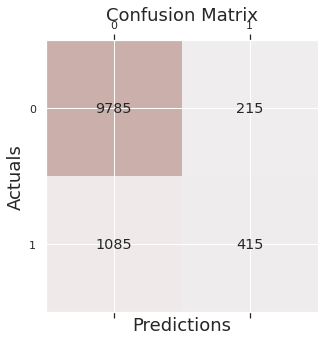

In [50]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [51]:
#Creating final output dataframe
results1 = pd.DataFrame(tuned_lr_y_pred)

Storing result column in csv file


In [52]:
results1.to_csv('results1.csv',index=False)

Implementing Random Forest with class weights

In [53]:
from sklearn.ensemble import RandomForestClassifier
w = {0:1, 1:4.5}
rfc = RandomForestClassifier(n_estimators = 10, class_weight=w, criterion = 'entropy')
rfc.fit(X, y)

RandomForestClassifier(class_weight={0: 1, 1: 4.5}, criterion='entropy',
                       n_estimators=10)

Calculating the confusion matrix for Random forest model

In [54]:
rfc_y_pred = rfc.predict(val_X)
cm = confusion_matrix(val_y, rfc_y_pred)
print("Confusion Matrix is :\n", cm)
acc = accuracy_score(val_y, rfc_y_pred)
print("Accuracy is :\n", acc)
precision = precision_score(val_y, rfc_y_pred)
print("Precision :", precision)
recall = recall_score(val_y, rfc_y_pred)
print("Recall :", recall)
F1score = f1_score(val_y, rfc_y_pred)
print("F1 score:", F1score)


Confusion Matrix is :
 [[9939   61]
 [1446   54]]
Accuracy is :
 0.8689565217391304
Precision : 0.46956521739130436
Recall : 0.036
F1 score: 0.06687306501547988


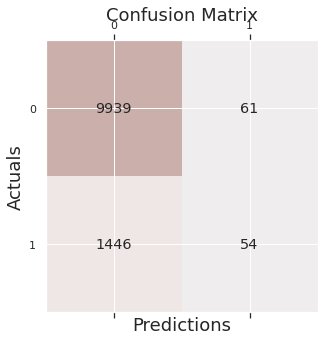

In [55]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Tuning Random Forest model

In [56]:
from sklearn.model_selection import RandomizedSearchCV
w = [{0:1.0,1:4.7}, {0:1.0,1:4.6}, {0:1.0,1:4.4}, {0:1.0,1:4.3}, 
     {0:1.0,1:4.5},{0:1.0,1:4.2} ]
params = {'bootstrap': [True, False],
          'max_depth': [5, 10, 15, 20, None],
          'class_weight':w,
          'max_features': ['auto', 'sqrt'], #  maximum number of features Random Forest can take in an individual tree
          'min_samples_leaf': [1, 2, 4], # the minimum number of samples required to be at a leaf node
          'min_samples_split': [2, 5, 10], # minimum number of samples required to split an internal node
          'n_estimators': [10,20,100,300]}
r_search = RandomizedSearchCV(estimator = rfc, 
                            param_distributions=params, 
                            random_state=42, 
                            n_iter=5, 
                            cv=10,
                            verbose=3, 
                            n_jobs=-1, 
                            return_train_score=True)
r_search.fit(X, y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 4.5},
                                                    criterion='entropy',
                                                    n_estimators=10),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [{0: 1.0, 1: 4.7},
                                                         {0: 1.0, 1: 4.6},
                                                         {0: 1.0, 1: 4.4},
                                                         {0: 1.0, 1: 4.3},
                                                         {0: 1.0, 1: 4.5},
                                                         {0: 1.0, 1: 4.2}],
                                        'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        '

In [57]:
r_search.best_params_

{'bootstrap': False,
 'class_weight': {0: 1.0, 1: 4.3},
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 10}

Re-modelling the random forest model


In [58]:
tuned_rfc = RandomForestClassifier(bootstrap=False,
                       class_weight={0: 1.0, 1: 4.3},
                       max_depth=15, max_features='sqrt',
                       min_samples_leaf=4,
                       min_samples_split=2,
                       n_estimators=10, 
                       random_state=0,)
tuned_rfc.fit(X,y)

RandomForestClassifier(bootstrap=False, class_weight={0: 1.0, 1: 4.3},
                       max_depth=15, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=10, random_state=0)

Confusion matrix for tuned random forest

In [59]:
tuned_rfc_y_pred = tuned_rfc.predict(val_X)
cm = confusion_matrix(val_y, tuned_rfc_y_pred)
print("Confusion Matrix is :\n", cm)
acc = accuracy_score(val_y, tuned_rfc_y_pred)
print("accuracy is :\n", acc)
precision = precision_score(val_y, tuned_rfc_y_pred)
print("Precision :", precision)
recall = recall_score(val_y, tuned_rfc_y_pred)
print("Recall :", recall)
F1score = f1_score(val_y, tuned_rfc_y_pred)
print("F1 score:", F1score)


Confusion Matrix is :
 [[9884  116]
 [1282  218]]
accuracy is :
 0.8784347826086957
Precision : 0.6526946107784432
Recall : 0.14533333333333334
F1 score: 0.23773173391494004


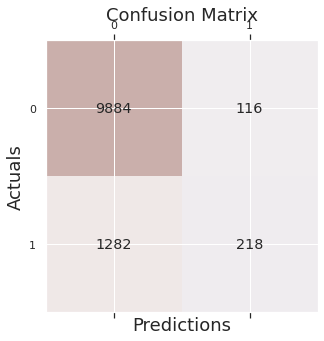

In [60]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [61]:
results2 = pd.DataFrame(tuned_rfc_y_pred)

Store results into csv file


In [62]:
results2.to_csv('results2.csv',index=False)

# ROC AUC Curve

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) for Random Forest

In [64]:
ytrain_pred = tuned_rfc.predict_proba(X)
print('RF train roc-auc: {}'.format(roc_auc_score(y, ytrain_pred[:,1])))
ytest_pred = tuned_rfc.predict_proba(val_X)
print('RF test roc-auc: {}'.format(roc_auc_score(val_y, ytest_pred[:,1])))

RF train roc-auc: 0.9670305583333334
RF test roc-auc: 0.7954836999999999


Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) for Logistic regression

In [65]:
ytrain_pred = lr_tuned.predict_proba(X)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y, ytrain_pred[:,1])))
ytest_pred = lr_tuned.predict_proba(val_X)
print('Logistic test roc-auc: {}'.format(roc_auc_score(val_y, ytest_pred[:,1])))

Logistic train roc-auc: 0.8136263541666666
Logistic test roc-auc: 0.8203647333333334


In [66]:
ytrain_pred = lr_tuned.predict_proba(X)
print(ytrain_pred)

[[0.95366528 0.04633472]
 [0.42089036 0.57910964]
 [0.55558408 0.44441592]
 ...
 [0.84775163 0.15224837]
 [0.94676736 0.05323264]
 [0.57078055 0.42921945]]


In [67]:
pred=[]
for model in [lr_tuned,tuned_rfc]:
    pred.append(pd.Series(model.predict_proba(val_X)[:,1]))

final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(val_y,final_prediction)))


Ensemble test roc-auc: 0.8228596666666667


In [68]:
#### Calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(val_y, final_prediction)
thresholds

array([1.88703064, 0.88703064, 0.87868952, ..., 0.01028162, 0.01025359,
       0.00539508])

In [69]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(val_y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()


,thresholds,accuracy
265,0.457420,0.885739
254,0.466561,0.885652
253,0.467224,0.885652
255,0.466476,0.885565
270,0.452927,0.885478


In [70]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show() 

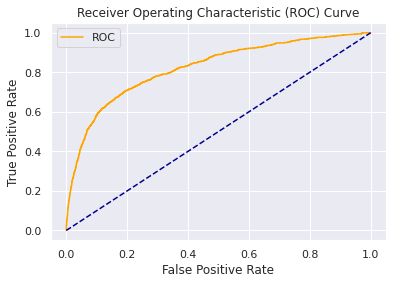

In [71]:
plot_roc_curve(fpr,tpr)